In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())

/media/tassnina/Study/VT/Research/Projects/drug-synergy-prediction/src/ML Models
/media/tassnina/Study/VT/Research/Projects/drug-synergy-prediction


In [3]:
base_input_dir = "inputs/train/"
base_output_dir = "outputs/"

base_test_score_path = "outputs/test_scores/"

In [4]:
# feature_types = ['only_MACCS', 'MACCS_Target']
# model = 'SVR'

In [5]:
SVR_test_score_only_MACCS_file = base_test_score_path + '/' + 'SVR' + '_'+ 'only_MACCS'+'_test_score.tsv'
SVR_test_score_MACCS_target_file =  base_test_score_path + '/' + 'SVR' + '_'+ 'MACCS_Target'+'_test_score.tsv'

GBR_test_score_only_MACCS_file =  base_test_score_path + '/' + 'GBR' + '_'+ 'only_MACCS'+'_test_score.tsv'
GBR_test_score_MACCS_target_file = base_test_score_path + '/' + 'GBR' + '_'+ 'MACCS_Target'+'_test_score.tsv'

SVM_test_score_only_MACCS_file =  base_test_score_path + '/' + 'SVM' + '_'+ 'only_MACCS'+'_test_score.tsv'

In [ ]:
SVR_only_MACCS_test_score_df = pd.read_csv(SVR_test_score_only_MACCS_file, sep = '\t', index_col = 0).\
                                rename(columns = {'pearsons': 'Pearsons Correlation', 'r2': 'R-Square'})
SVR_MACCS_target_test_score_df = pd.read_csv(SVR_test_score_MACCS_target_file, sep = '\t',  index_col = 0).\
                                rename(columns = {'pearsons': 'Pearsons Correlation', 'r2': 'R-Square'})
GBR_only_MACCS_test_score_df = pd.read_csv(GBR_test_score_only_MACCS_file, sep = '\t',  index_col = 0).\
                                rename(columns = {'pearsons': 'Pearsons Correlation', 'r2': 'R-Square'})
GBR_MACCS_target_test_score_df = pd.read_csv(GBR_test_score_MACCS_target_file, sep = '\t',  index_col = 0).\
                                rename(columns = {'pearsons': 'Pearsons Correlation', 'r2': 'R-Square'})

In [ ]:
print(SVR_only_MACCS_test_score_df)
print(SVR_MACCS_target_test_score_df)
print(GBR_only_MACCS_test_score_df)
print(GBR_MACCS_target_test_score_df)

In [ ]:
def plot_grouped_test_score(df1, df2, metric,label_list, file_name, colors):
    
    df2 = df2.reindex(df1.index)
    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars1 = df1[metric].to_numpy()
    bars2 = df2[metric].to_numpy()

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color=colors[0], width=barWidth, edgecolor='white', label=label_list[0])
    plt.bar(r2, bars2, color=colors[1], width=barWidth, edgecolor='white', label=label_list[1])

    # Add xticks on the middle of the group bars
    plt.xlabel('cell lines')
    plt.ylabel(metric)
    
    cell_lines = list(df1.index)
    plt.xticks([r + barWidth for r in range(len(bars1))], cell_lines , rotation='vertical' )

    # Create legend & Show graphic
    plt.legend()
    plt.savefig(file_name, bbox_inches ="tight", format = 'pdf')
    
    plt.show()
    plt.close()

In [ ]:
metrics = ['mse','R-Square','Pearsons Correlation']
score_df_list_per_feature_types_dict = {'only_MACCS':[], 'MACCS_Target':[]}
colors = {'only_MACCS': ['seagreen','chocolate'], 'MACCS_Target':['steelblue','rosybrown']}
## maintain the order in model order to keep score dfs in score_df_list_per_feature_types_dict. \
## e.g. SVR first, GBR second
model_order = ['SVR','GBR']
score_df_list_per_feature_types_dict['only_MACCS'] = \
                                [SVR_only_MACCS_test_score_df, GBR_only_MACCS_test_score_df]
score_df_list_per_feature_types_dict['MACCS_Target'] = \
                                [SVR_MACCS_target_test_score_df, GBR_MACCS_target_test_score_df]
for feature_combo in score_df_list_per_feature_types_dict:
    for metric in metrics:
        
        plot_file_name = base_test_score_path + 'Viz/' + feature_combo+'_'+metric+ '_SVR_GBR.pdf'
        os.makedirs(os.path.dirname(plot_file_name), exist_ok=True)
        
        df1 = score_df_list_per_feature_types_dict[feature_combo][0][:10]
        df2 = score_df_list_per_feature_types_dict[feature_combo][1][:10]
        plot_grouped_test_score(df1, df2, \
                                metric, model_order, plot_file_name,colors[feature_combo])

In [ ]:
def plot_grouped_test_score_2(df_list, metric,label_list, file_name):
#     colors = iter(cm.tab20(np.linspace(0, 1, 10)))
    colors = ['seagreen','chocolate', 'steelblue','rosybrown']
    barWidth = 0.2
    count=0
    for df in df_list:
        df = df.reindex(df_list[0].index)
        
        # set height of bar
        bar_height = df[metric].to_numpy()


        # Set position of bar on X axis
        r = np.arange(len(bar_height))
        r1 = [x + barWidth*count for x in r]

        # Make the plot
#         plt.bar(r1, bar_height, color=next(colors), width=barWidth, edgecolor='white', label=label_list[count])
        plt.bar(r1, bar_height, color=colors[count], width=barWidth, edgecolor='white', label=label_list[count])
        count+=1

    # Add xticks on the middle of the group bars
    plt.xlabel('cell lines')
    plt.ylabel(metric)
    
    cell_lines = list(df.index)
    plt.xticks([r + barWidth for r in range(len(bar_height))], cell_lines , rotation='vertical' )

    # Create legend & Show graphic
    plt.legend()
    plt.savefig(file_name, bbox_inches ="tight", format = 'pdf')
    
    plt.show()
    plt.close()

In [ ]:
metrics = ['mse','R-Square','Pearsons Correlation']
score_df_list_per_feature_types_dict = {'only_MACCS':[], 'MACCS_Target':[]}

## maintain the order in model order to keep score dfs in score_df_list_per_feature_types_dict. \
## e.g. SVR first, GBR second
model_order = ['SVR-MACCS','GBR-MACCS','SVR-MACCS-target','GBR-MACCS-target']
score_df_list_per_feature_types_dict['only_MACCS'] = \
                                [SVR_only_MACCS_test_score_df, GBR_only_MACCS_test_score_df]
score_df_list_per_feature_types_dict['MACCS_Target'] = \
                                [SVR_MACCS_target_test_score_df, GBR_MACCS_target_test_score_df]


for metric in metrics:
    df_list = []
    for feature_combo in score_df_list_per_feature_types_dict:
        plot_file_name = base_test_score_path + 'Viz/' + feature_combo[0]+'_'+feature_combo[1] +'_'+metric+ '_SVR_GBR.pdf'
        os.makedirs(os.path.dirname(plot_file_name), exist_ok=True)
        
        df_list.append(score_df_list_per_feature_types_dict[feature_combo][0][:10])
        df_list.append(score_df_list_per_feature_types_dict[feature_combo][1][:10])
    plot_grouped_test_score_2(df_list, metric, model_order, plot_file_name)

In [ ]:
def plot_cross_validation_metrics_SVR(kernel_specific_cross_val_score_df_dict, metric,cell_line,plot_file_name):
    colors = iter(cm.tab20(np.linspace(0, 1, 10)))
                                         
    for kernel in kernel_specific_cross_val_score_df_dict:
                                         
        plt.plot( 'C', metric, data=kernel_specific_cross_val_score_df_dict[kernel], marker='',\
                 markerfacecolor='blue', markersize=8, color=next(colors), linewidth=2, label = kernel)
    plt.xlabel('C')
    plt.ylabel(metric)
    plt.title(cell_line)
    plt.legend()
    plt.savefig(plot_file_name, bbox_inches ="tight", format = 'pdf')
    plt.show()
    plt.close()

In [ ]:
#Plot cross validation for one cell line for SVR model
cell_line = 'U251'
feature_types = ['only_MACCS', 'MACCS_Target']
model = 'SVR'
kernel_list = ['linear','poly','rbf']
kernel_based_score_df_dict = {kernel : pd.DataFrame() for kernel in kernel_list}
for feature_combo in feature_types:
    for kernel in kernel_list:
        file_name = base_output_dir + '/' + feature_combo + '/' + model +'/' +\
                    cell_line + '/' +  kernel + '_r2_mse_pearsons_score.tsv'
        #read file such that dataframe index will be th C values of SVR model
        kernel_based_score_df_dict[kernel] = pd.read_csv(file_name, sep='\t').rename(columns={'Unnamed: 0':'C'})
        #print(kernel_based_score_df_dict[kernel].head())
        
    plot_file_name = base_output_dir + '/' + feature_combo + '/' + model +'/' +\
                    cell_line + '/' + 'linear_poly_rbf_mse_plot.pdf'
    plot_cross_validation_metrics_SVR(kernel_based_score_df_dict, 'mse', cell_line, plot_file_name)
        

In [14]:
##plot SVM accuracy
SVM_only_MACCS_df = pd.read_csv(SVM_test_score_only_MACCS_file, sep='\t', index_col=0)
print(SVM_only_MACCS_df.head())

SVM_only_MACCS_df = SVM_only_MACCS_df[:20]


             c kernel  max_5_fold_accuracy  accuracy  precision    recall  \
HCC-2998    21   poly             0.815548  0.831933   0.750355  0.521852   
MDA-MB-435  51   poly             0.805592  0.835391   0.417695  0.500000   
DIPG25      31    rbf             0.729551  0.745763   0.661998  0.594458   
COLO 205    61   poly             0.774198  0.820408   0.785788  0.530096   
HCT-15      16    rbf             0.784072  0.745968   0.566667  0.511221   

                  f1  
HCC-2998    0.499158  
MDA-MB-435  0.455157  
DIPG25      0.601486  
COLO 205    0.510000  
HCT-15      0.469708  


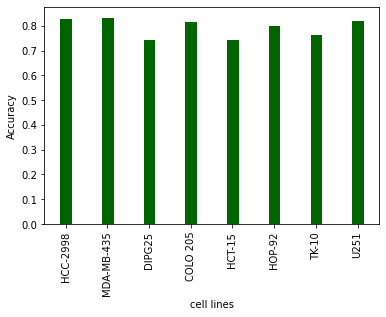

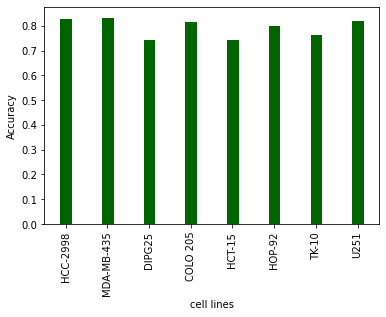

In [15]:
barWidth = 0.3

bar_height = SVM_only_MACCS_df["accuracy"].to_numpy()


# Set position of bar on X axis
r = np.arange(len(bar_height))
r1 = [x + barWidth for x in r]

# Make the plot
plt.bar(r1, bar_height, color="darkgreen", width=barWidth, edgecolor='white')

# Add xticks on the middle of the group bars
plt.xlabel('cell lines')
plt.ylabel('Accuracy')

cell_lines = list(SVM_only_MACCS_df.index)
plt.xticks([r + barWidth for r in range(len(bar_height))], cell_lines , rotation='vertical' )

plot_file_name = base_test_score_path + 'Viz/' + 'only_MACCS' +'_'+'accuracy'+ '_SVM.pdf'
plt.savefig(plot_file_name, bbox_inches ="tight", format = 'pdf')
plt.show()
plt.close()


